In [5]:




from google.colab import files


uploaded = files.upload()

Saving loan.csv to loan.csv


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
#increase max row and column display value
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [7]:
#Reading
loan_data = pd.read_csv("loan.csv")
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [8]:
# Inspecting
loan_data.shape


(39717, 111)

In [9]:
loan_data_info=loan_data.info()  #To get overall info on data
loan_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# **DATA PREPARATION STEPS**

In [10]:
loan_data.isnull().sum().sort_values(ascending=False)

,0
verification_status_joint,39717
annual_inc_joint,39717
mo_sin_old_rev_tl_op,39717
mo_sin_old_il_acct,39717
bc_util,39717
bc_open_to_buy,39717
avg_cur_bal,39717
acc_open_past_24mths,39717
inq_last_12m,39717
total_cu_tl,39717


In [11]:
#Missing Values
#Finding percentage of null or missing values
null_perc = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
#Printing columns which have more than 0% missing values
null_perc[ null_perc > 0 ]

,0
emp_title,6.19
emp_length,2.71
desc,32.59
title,0.03
mths_since_last_delinq,64.66
mths_since_last_record,92.99
revol_util,0.13
last_pymnt_d,0.18
next_pymnt_d,97.13
last_credit_pull_d,0.01


In [12]:
#Dropping columns with 100% Null Values
loan_data_after_null=loan_data.drop(null_perc[ null_perc == 100 ].index, axis=1)

In [13]:
#Checking for Null%  data after null removal
null_percentage = round(100*(loan_data_after_null.isnull().sum()/len(loan_data_after_null.index)), 2)
null_percentage[ null_percentage > 0 ]

,0
emp_title,6.19
emp_length,2.71
desc,32.59
title,0.03
mths_since_last_delinq,64.66
mths_since_last_record,92.99
revol_util,0.13
last_pymnt_d,0.18
next_pymnt_d,97.13
last_credit_pull_d,0.01


In [14]:
#Removal of NUll Columns for columns more than 60%
loan=loan_data_after_null.drop(null_percentage[ null_percentage >= 60 ].index, axis=1)
# check if 60% null columns dropped or not
null_percentage = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_percentage[ null_percentage > 0 ]

,0
emp_title,6.19
emp_length,2.71
desc,32.59
title,0.03
revol_util,0.13
last_pymnt_d,0.18
last_credit_pull_d,0.01
collections_12_mths_ex_med,0.14
chargeoff_within_12_mths,0.14
pub_rec_bankruptcies,1.75


In [15]:
# finding unique values in the columns
loan.nunique().sort_values(ascending=True)

,0
tax_liens,1
delinq_amnt,1
chargeoff_within_12_mths,1
acc_now_delinq,1
application_type,1
policy_code,1
initial_list_status,1
collections_12_mths_ex_med,1
pymnt_plan,1
term,2


We can See that there are 9 columns with 1 value only, so we will drop those columns and check again if those columns are dropped or not

In [16]:
loan.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)


In [17]:
# finding unique values in the columns
loan.nunique().sort_values(ascending=True)

,0
term,2
pub_rec_bankruptcies,3
loan_status,3
verification_status,3
pub_rec,5
home_ownership,5
grade,7
inq_last_6mths,9
delinq_2yrs,11
emp_length,11


In [18]:
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


Member_id and url are not needed,so removing them
Emp_Title and title are not needed as its not required.
Desc is also not required

In [19]:
loan.drop(['member_id', 'url','emp_title', 'title'], axis=1, inplace=True)

In [20]:
loan.drop(['desc'],axis=1 ,inplace=True)

In [21]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [22]:
loan.shape

(39717, 40)

The aim is to find all risky loan applications, so the columns for 'total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d','out_prncp', 'out_prncp_inv' will not useful in this study, Since these fields are created after the loan is approved.

In [23]:
delete_columns = ['recoveries', 'collection_recovery_fee',
            'last_pymnt_d','out_prncp', 'out_prncp_inv','total_rec_int', 'total_rec_prncp', 'total_rec_late_fee',
            'last_credit_pull_d']
loan.drop(columns=delete_columns, axis=1, inplace=True)
loan.shape

(39717, 31)

In [24]:
null_perc = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_perc[ null_perc > 0 ]

,0
emp_length,2.71
revol_util,0.13
pub_rec_bankruptcies,1.75


Remove some rows with null data and cheeck for 0 % of null data

In [25]:
loan.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)

In [26]:
null_perc = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_perc[ null_perc > 0 ]

,0


Loan Status cannot be of Current type

In [27]:
#Removing current loan status rows
loan = loan[loan.loan_status != 'Current']

In [28]:
loan.shape

(36800, 31)

In [29]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,171.62,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,119.66,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,3005.666844,3005.67,649.91,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,357.48,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,5632.210000,5632.21,161.03,0.0


In [30]:
loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

We can see that term has additional spaces at front , so we need to remove it

In [31]:
loan['term'] = loan.term.str.strip()
loan.term.unique()

array(['36 months', '60 months'], dtype=object)

In [32]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,171.62,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,119.66,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,3005.666844,3005.67,649.91,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,357.48,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,5632.210000,5632.21,161.03,0.0


Removal of % symbol in 2 columns int_rate and revol_util

In [33]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan['revol_util'] = loan['revol_util'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [34]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,5863.155187,5833.84,171.62,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,1008.710000,1008.71,119.66,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,3005.666844,3005.67,649.91,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,12231.890000,12231.89,357.48,0.0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,5632.210000,5632.21,161.03,0.0


## DATATYPE CONVERSIONS

In [35]:
loan.dtypes

,0
id,int64
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
term,object
int_rate,float64
installment,float64
grade,object
sub_grade,object
emp_length,object


In [36]:
import datetime
def convert_to_mmm_yyyy(date_str):
    parsed = datetime.datetime.strptime(date_str,'%b-%y')
    current_date = datetime.datetime.now()
    if parsed > current_date:
        parsed = parsed.replace(year=parsed.year - 100)
    return parsed.strftime("%b-%Y")

# convert issue_d in format of MMM-YYYY
loan['issue_d'] = loan['issue_d'].apply(lambda x : convert_to_mmm_yyyy(x))
loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(lambda x : convert_to_mmm_yyyy(x))


In [37]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-1985,1,3,0,13648,83.7,9,5863.155187,5833.84,171.62,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,309xx,GA,1.00,0,Apr-1999,5,3,0,1687,9.4,4,1008.710000,1008.71,119.66,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,small_business,606xx,IL,8.72,0,Nov-2001,2,2,0,2956,98.5,10,3005.666844,3005.67,649.91,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,other,917xx,CA,20.00,0,Feb-1996,1,10,0,5598,21.0,37,12231.890000,12231.89,357.48,0.0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-2004,3,9,0,7963,28.3,12,5632.210000,5632.21,161.03,0.0


ADD MONTH and YEAR columns for the above altered columns for analysis

In [38]:
loan['issue_d_month']=loan['issue_d'].apply(lambda x : str(x.split('-')[0]))
loan['issue_d_year']=loan['issue_d'].apply(lambda x : int(x.split('-')[1]))

In [39]:
loan.issue_d_month.unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

In [40]:
loan.issue_d_year.unique()

array([2011, 2010, 2009, 2008, 2007])

In [41]:
loan['earliest_cr_line_month']=loan['earliest_cr_line'].apply(lambda x : str(x.split('-')[0]))
loan['earliest_cr_line_year']=loan['earliest_cr_line'].apply(lambda x : int(x.split('-')[1]))

In [42]:
loan.earliest_cr_line_month.unique()

array(['Jan', 'Apr', 'Nov', 'Feb', 'Jul', 'Sep', 'Oct', 'May', 'Aug',
       'Jun', 'Dec', 'Mar'], dtype=object)

In [43]:
loan.earliest_cr_line_year.unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1979, 1978, 1971, 1972, 1970,
       1969, 1975, 1976, 1977, 1982, 1968, 1974, 1967, 1965, 1973, 1963,
       1966, 1962, 1956, 1946, 1950, 1964, 1954])

In [44]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-1985,1,3,0,13648,83.7,9,5863.155187,5833.84,171.62,0.0,Dec,2011,Jan,1985
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,309xx,GA,1.00,0,Apr-1999,5,3,0,1687,9.4,4,1008.710000,1008.71,119.66,0.0,Dec,2011,Apr,1999
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,small_business,606xx,IL,8.72,0,Nov-2001,2,2,0,2956,98.5,10,3005.666844,3005.67,649.91,0.0,Dec,2011,Nov,2001
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,other,917xx,CA,20.00,0,Feb-1996,1,10,0,5598,21.0,37,12231.890000,12231.89,357.48,0.0,Dec,2011,Feb,1996
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-2004,3,9,0,7963,28.3,12,5632.210000,5632.21,161.03,0.0,Dec,2011,Nov,2004


# ***UNIVARIATE ANALYSIS***

##We will now start with the analysis

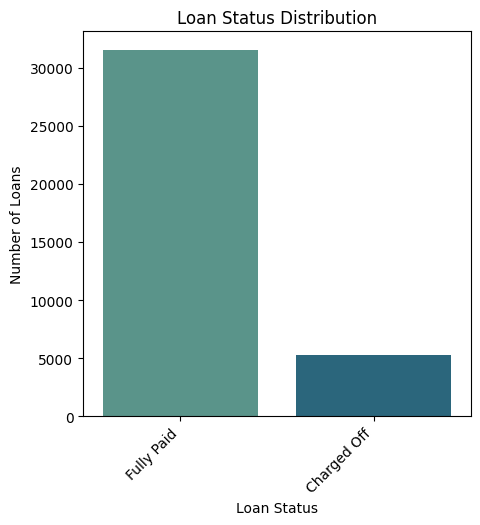

In [45]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="loan_status", data=loan, palette="crest")
plt.title('Loan Status Distribution')
ax.set(xlabel='Loan Status', ylabel='Number of Loans')
plt.xticks(rotation=45, ha='right')
plt.show()

This indicates
1. More than 30K loans were paid off
2. Only 5k loans were not paid off

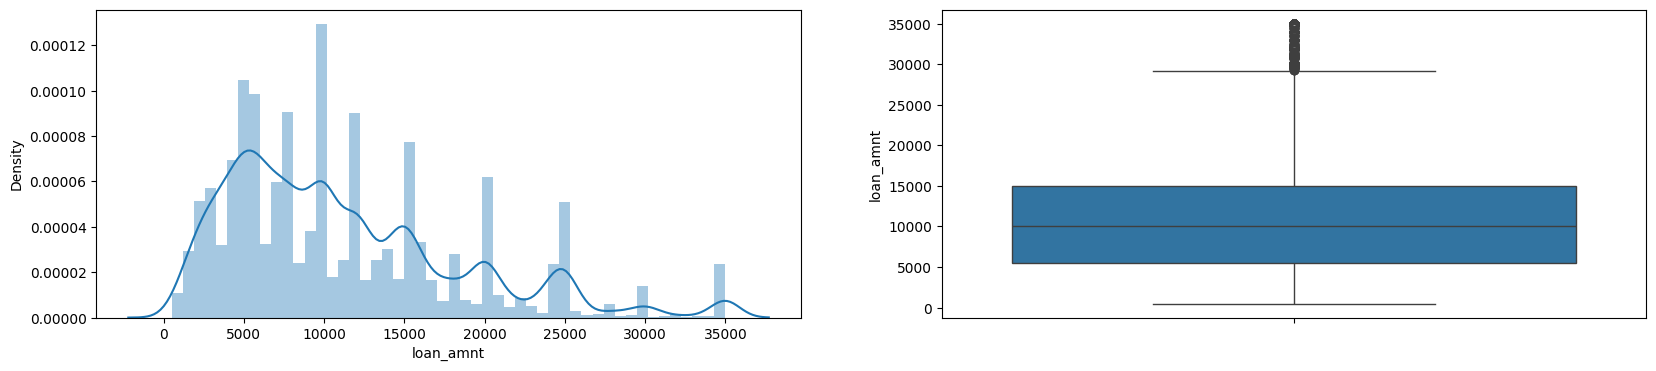

In [46]:
# we will start with loan amount
#Distribution plot of loan amount
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.distplot(loan['loan_amnt'])
plt.subplot(1,2,2)
sns.boxplot(loan['loan_amnt'])
plt.show()

In [47]:
loan.loan_amnt.describe()

,loan_amnt
count,36800.000000
mean,11149.540761
std,7369.855703
min,500.000000
25%,5500.000000
50%,10000.000000
75%,15000.000000
max,35000.000000


From the graph we can say that:-
1. 10000 was the most loaned amount by each person
2. The highest amount disbursed is 35000.
3. The count of people who took 30000 was the lowest.
4. Majority of loan amount is between 5000 and 15000




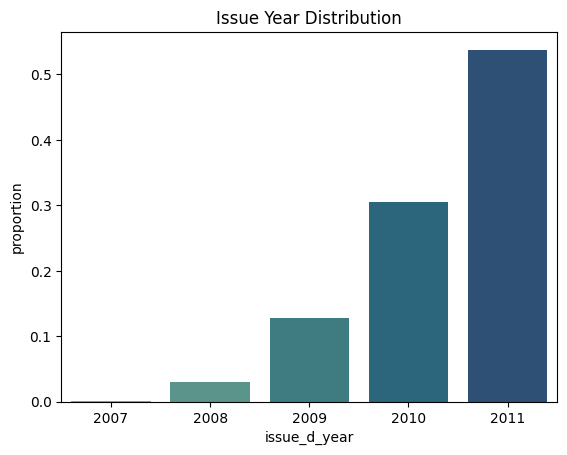

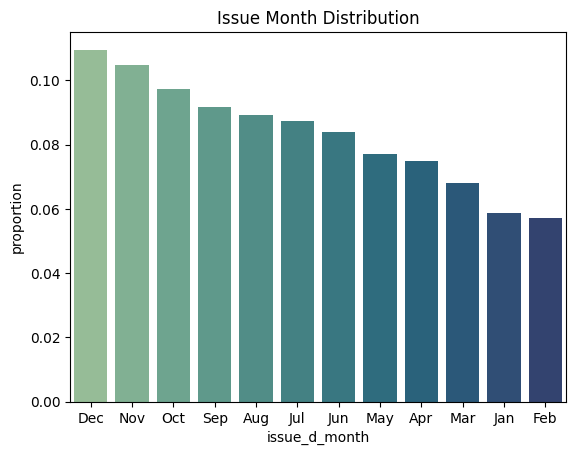

In [48]:
pub_df_year = loan['issue_d_year'].value_counts(normalize=True).reset_index()
sns.barplot(x= 'issue_d_year', y= 'proportion', data=pub_df_year,palette='crest')
plt.title('Issue Year Distribution')
plt.show()

pub_df_month = loan['issue_d_month'].value_counts(normalize=True).reset_index()
sns.barplot(x= 'issue_d_month', y= 'proportion', data=pub_df_month,palette='crest')
plt.title('Issue Month Distribution')
plt.show()

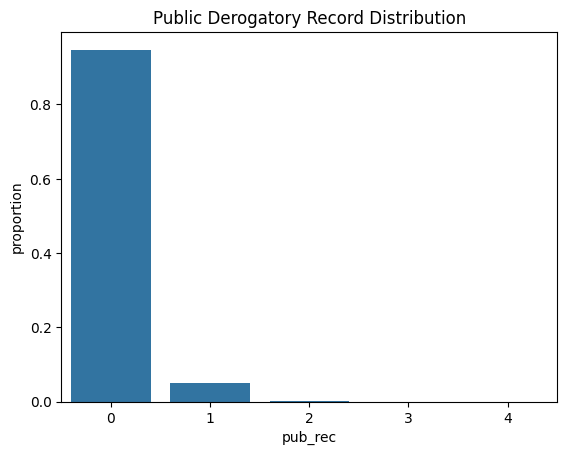

In [49]:
pub_df = loan['pub_rec'].value_counts(normalize=True).reset_index()
sns.barplot(x= 'pub_rec', y= 'proportion', data=pub_df)
plt.title('Public Derogatory Record Distribution')
plt.show()

More than 90 % of people do not have Public derogatory report

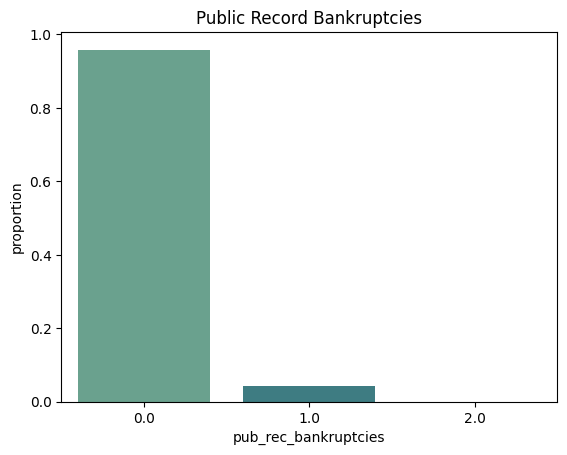

In [50]:
pub_rec_df = loan['pub_rec_bankruptcies'].value_counts(normalize=True).reset_index()
sns.barplot(x= 'pub_rec_bankruptcies', y= 'proportion', data=pub_rec_df,palette="crest")
plt.title('Public Record Bankruptcies')
plt.show()

More than 95% people didnot went into bankruptcy

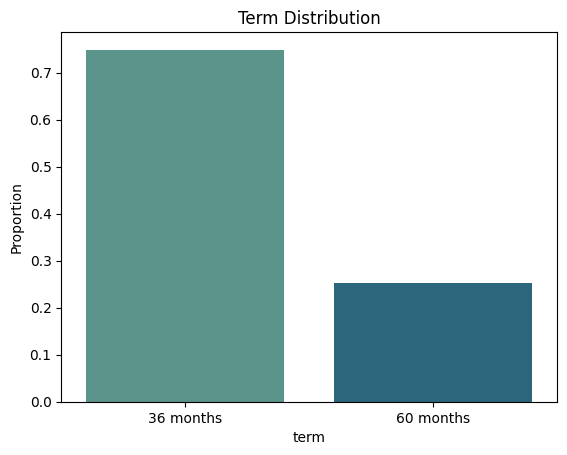

In [51]:
prob_df = loan['term'].value_counts(normalize=True).reset_index()
sns.barplot(x='term', y='proportion', data=prob_df, palette='crest')
plt.title('Term Distribution')
plt.xlabel('term')
plt.ylabel('Proportion')
plt.show()

More Loan Takers prefer 36 month over 60 month

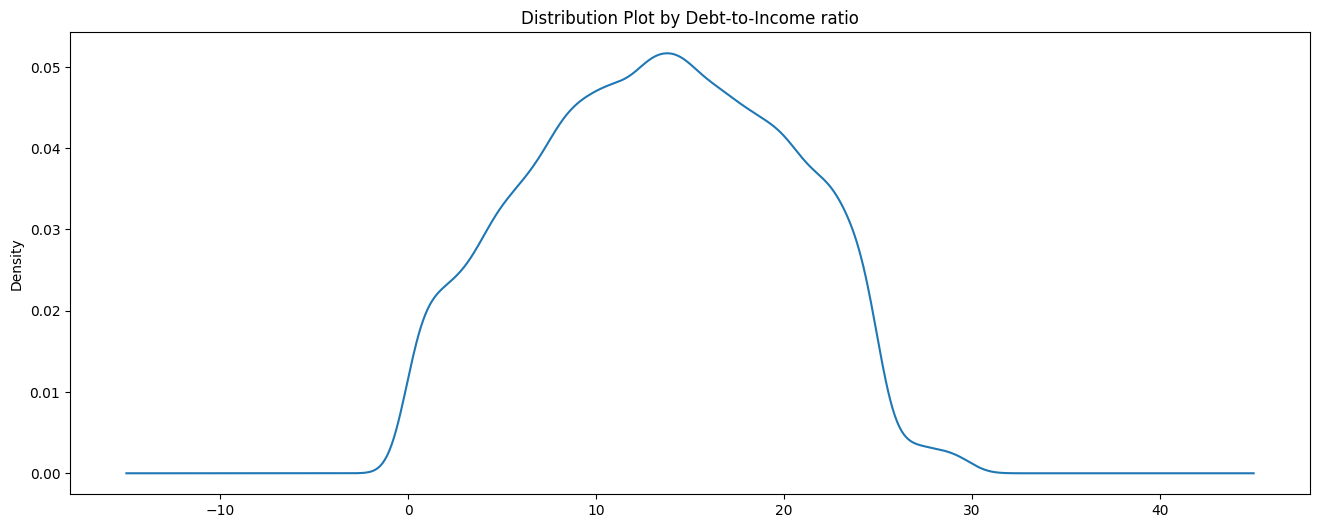

In [52]:
# Distribution plot by Debt-to-Income ratio

fig = plt.figure(figsize=(16,6))
loan["dti"].plot(kind='kde')
plt.title("Distribution Plot by Debt-to-Income ratio")
plt.show()

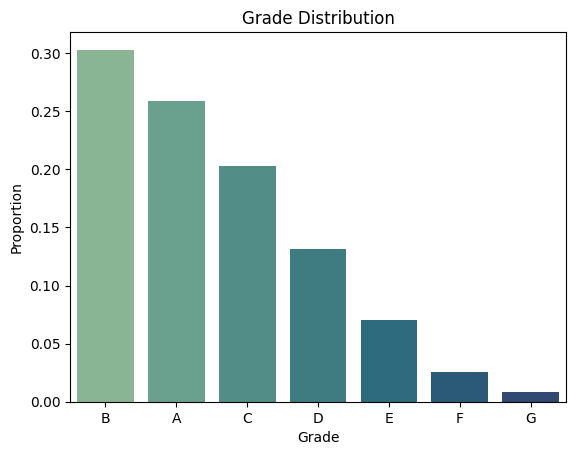

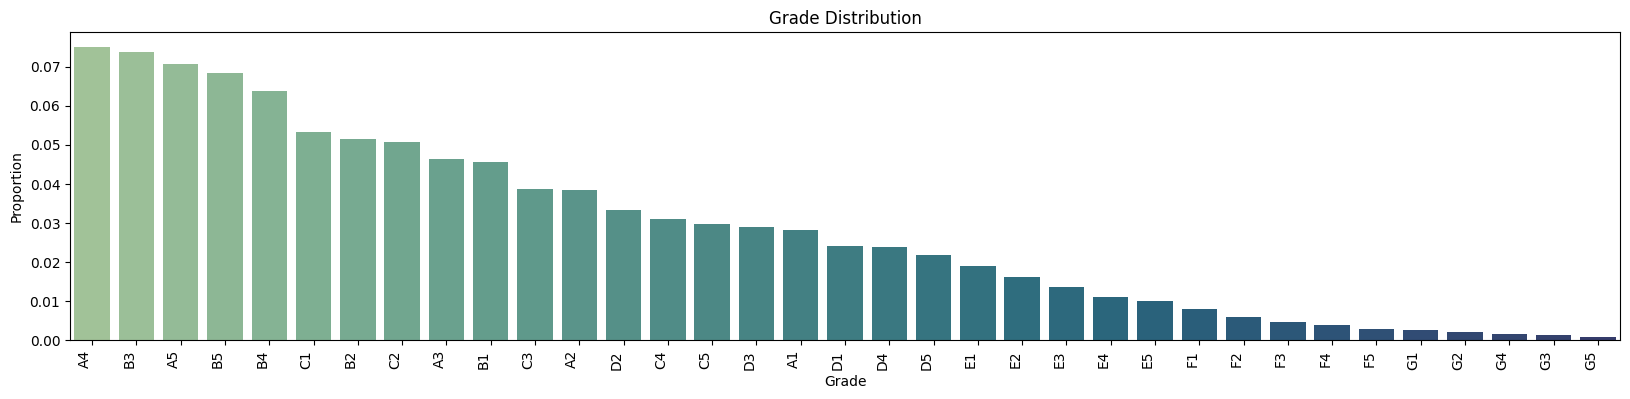

In [53]:
prob_df = loan['grade'].value_counts(normalize=True).reset_index()
sns.barplot(x='grade', y='proportion', data=prob_df, palette='crest')
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Proportion')
plt.show()
plt.figure(figsize=(20,4))
prob_df = loan['sub_grade'].value_counts(normalize=True).reset_index()
sns.barplot(x='sub_grade', y='proportion', data=prob_df, palette='crest')
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Proportion')
plt.xticks(rotation=90, ha='right')
plt.show()

Most loan takers on an average are of B Grade.Most Loan Takers are of A4 and B3 category.

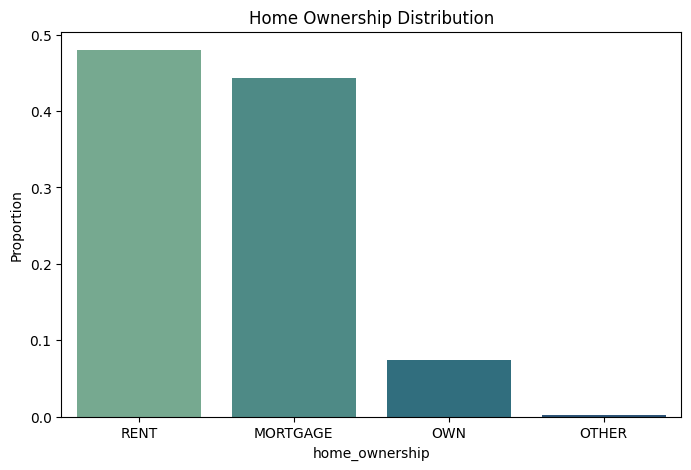

In [54]:
plt.figure(figsize=(8,5))
prob_df = loan['home_ownership'].value_counts(normalize=True).reset_index()
sns.barplot(x='home_ownership', y='proportion', data=prob_df,palette='crest')
plt.xlabel('home_ownership')
plt.ylabel('Proportion')
plt.title('Home Ownership Distribution')
plt.show()

Most Loan takers are either in Rent or Mortage.

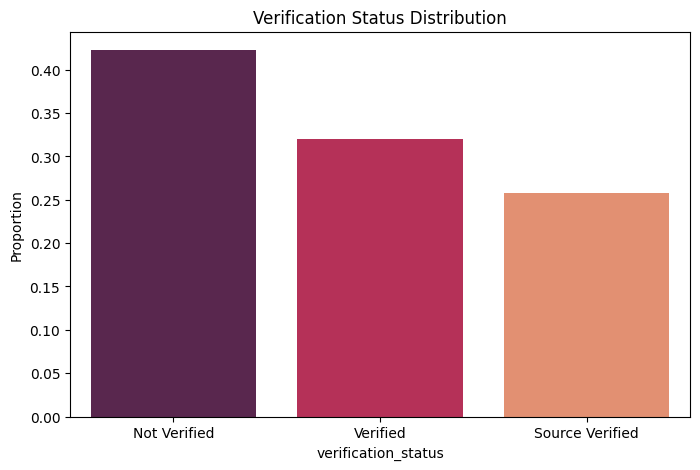

In [55]:
plt.figure(figsize=(8,5))
prob_df = loan['verification_status'].value_counts(normalize=True).reset_index()
sns.barplot(x='verification_status', y='proportion', data=prob_df,palette='rocket')
plt.xlabel('verification_status')
plt.ylabel('Proportion')
plt.title('Verification Status Distribution')
plt.show()

Most loan takers are not verified

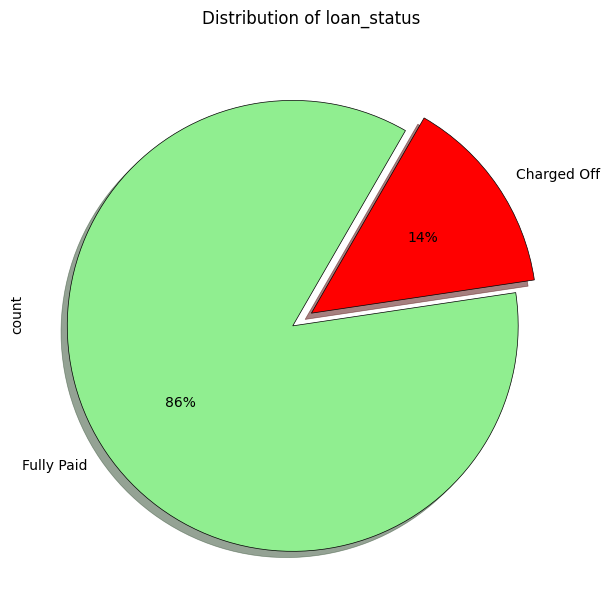

In [56]:
# Percentage distribution of 'loan_status' in pieplot

fig = plt.figure(figsize=(16,8))
plt.subplot(121)
loan["loan_status"].value_counts().plot.pie(autopct = "%1.0f%%",
                                               colors = ["lightgreen", "red"],
                                               startangle = 60,
                                               wedgeprops = {"linewidth":.5,"edgecolor":"k"},
                                               explode=(.1,0),
                                               shadow =True)
plt.title("Distribution of loan_status")
plt.show()

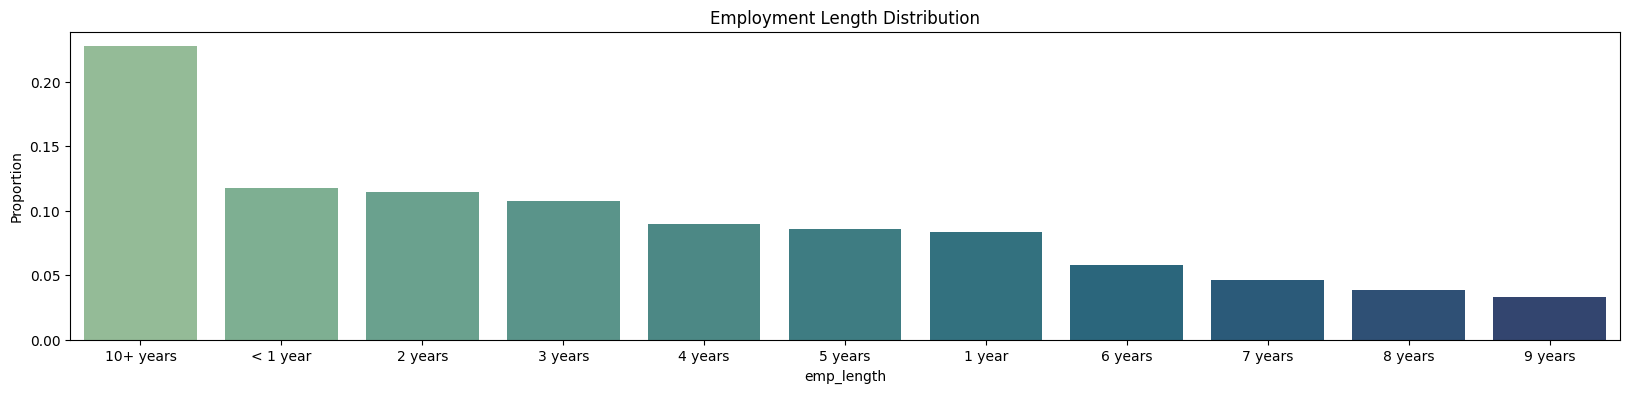

In [57]:
plt.figure(figsize=(20,4))
prob_df = loan['emp_length'].value_counts(normalize=True).reset_index()
sns.barplot(x='emp_length', y='proportion', data=prob_df, palette='crest')
plt.xlabel('emp_length')
plt.ylabel('Proportion')
plt.title('Employment Length Distribution')
plt.show()

Most of the loan takers have more than 10+ years of duration of experience

# ***Univariate Segmented Analysis***

Focused Analysis on charged off loan status as aim is to find risky loan takers

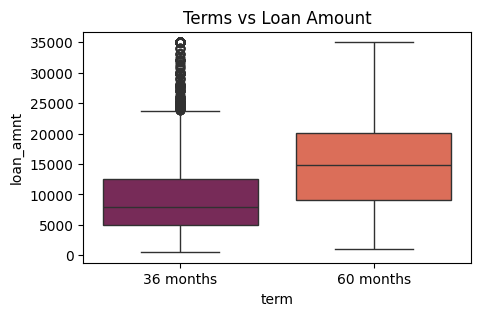

In [58]:
plt.figure(figsize=(5,3))
sns.boxplot(x='term', y=loan.loan_amnt, data=loan, palette="rocket")
plt.title('Terms vs Loan Amount')
plt.show()

From the above plot, we can say that for 60 months term , the loan amount is more

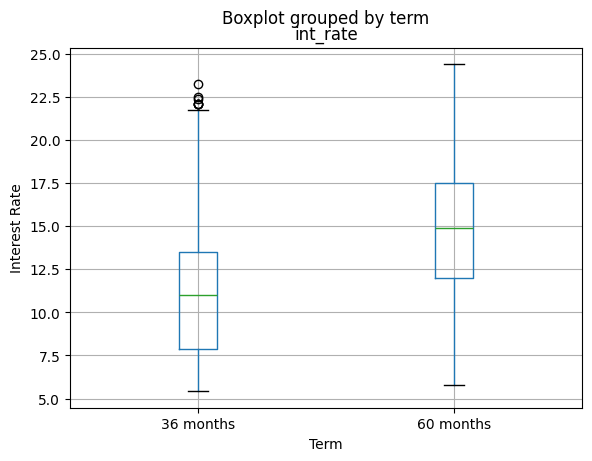

In [59]:
ax = loan.boxplot(column='int_rate', by='term')
ax.set(xlabel='Term', ylabel='Interest Rate')
plt.show()

Interest rate is higher for 60 months term

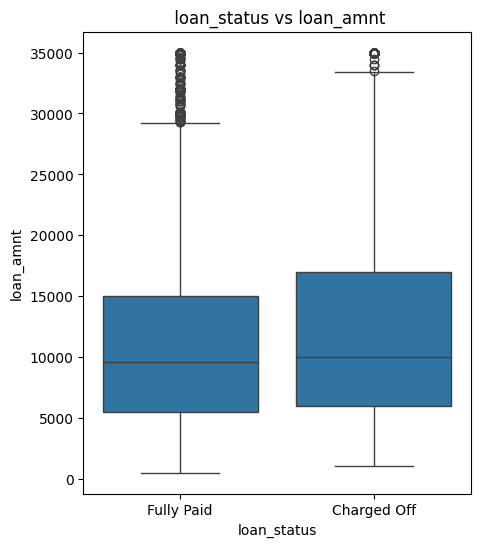

In [60]:
plt.figure(figsize=(5,6))
plt.subplot(1,1,1)
sns.boxplot(x="loan_status", y="loan_amnt", data=loan)
plt.title(" loan_status vs loan_amnt")
plt.show()

Amount is higher for Charged_off/Defaulter

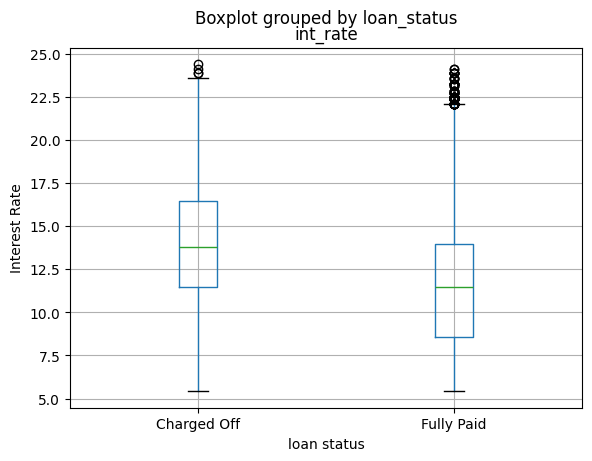

In [61]:
ax = loan.boxplot(column='int_rate', by='loan_status')
ax.set(xlabel='loan status', ylabel='Interest Rate')
plt.show()

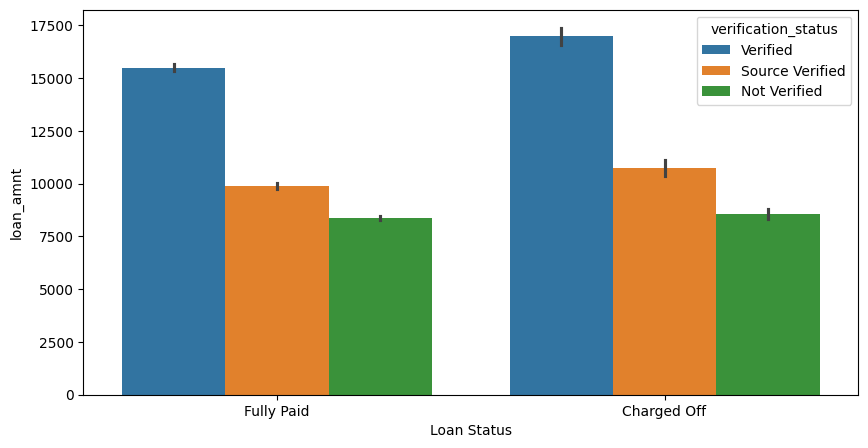

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(x='loan_status',y='loan_amnt', hue='verification_status', data=loan)
plt.xlabel("Loan Status")
plt.show()

From the above graph we can say that most of the Defaulters are from Verified resources, therefore this can be chance of corruption within the system.

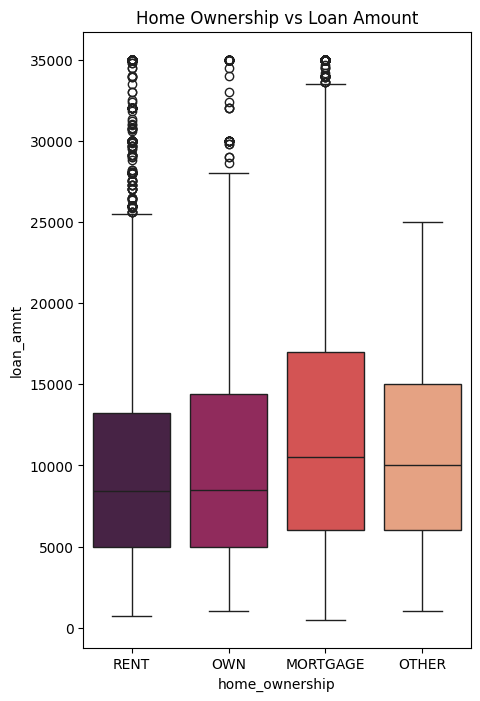

In [63]:
plt.figure(figsize=(5,8))
sns.boxplot(x='home_ownership', y='loan_amnt', data=loan,palette='rocket')
plt.title('Home Ownership vs Loan Amount')
plt.show()

Mortgage has the highest loan amount

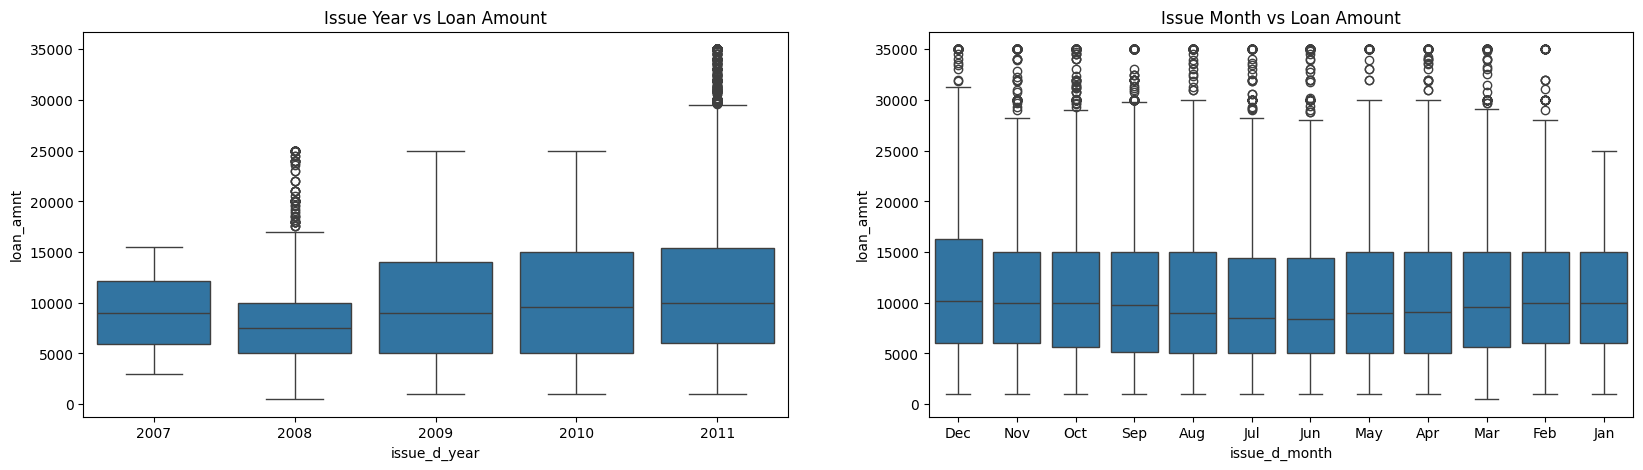

In [64]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan.issue_d_year, y=loan.loan_amnt, data=loan)
plt.title('Issue Year vs Loan Amount')
plt.subplot(122)
sns.boxplot(x=loan.issue_d_month, y=loan.loan_amnt, data=loan)
plt.title('Issue Month vs Loan Amount')
plt.show()

loan borrowers have availed nearly equal amounts, with the exception of December, where individuals have obtained larger sums due to a significantly higher distribution above the median. In 2011 there are many outliers.

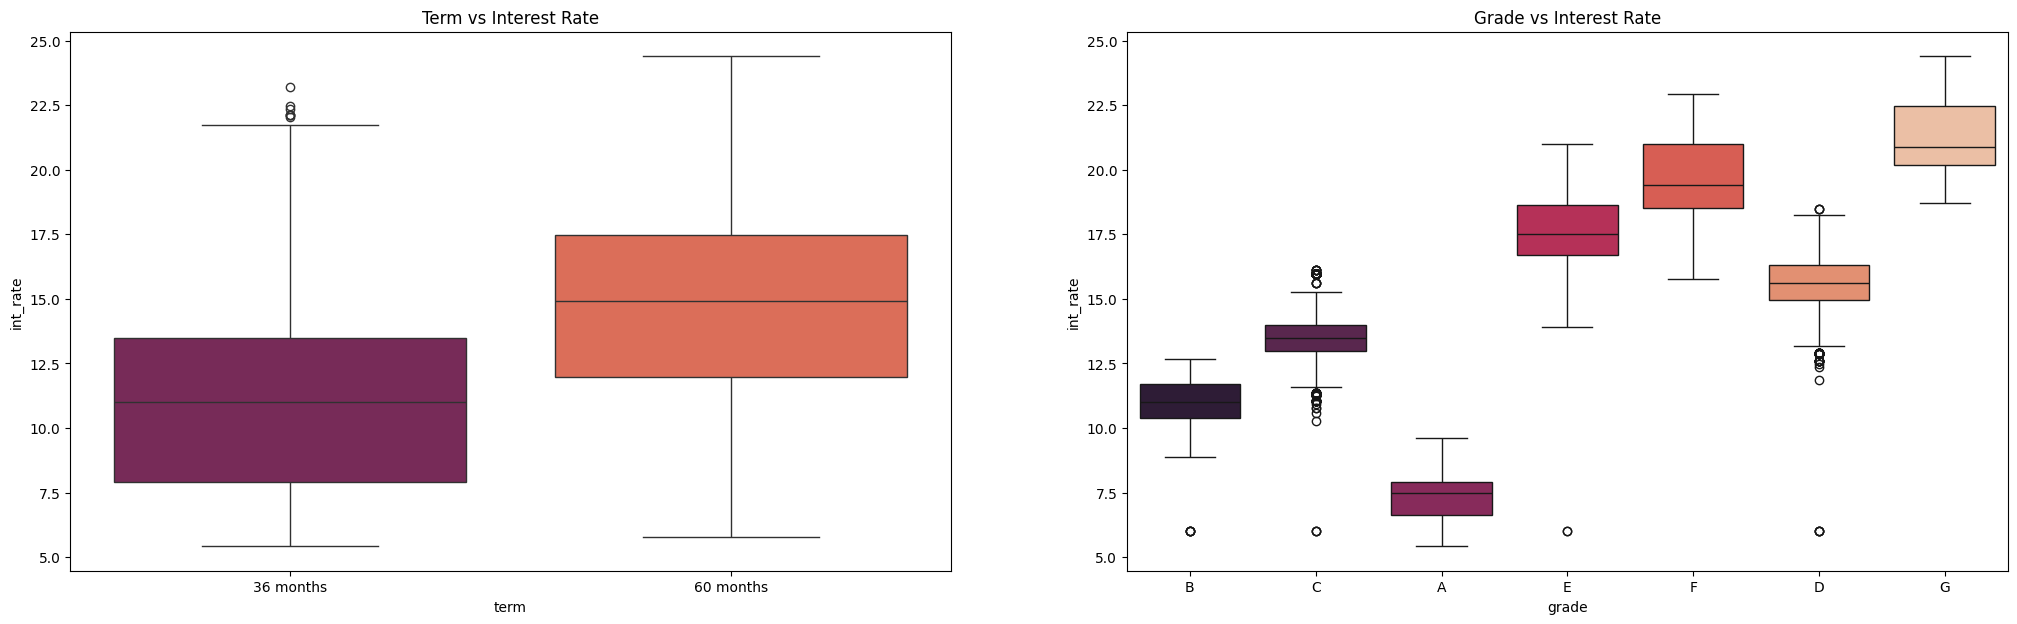

In [65]:
plt.figure(figsize=(25,7))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', data=loan,palette='rocket')
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
sns.boxplot(x='grade', y=loan.int_rate, order = (loan.grade.unique()).sort(), data=loan, palette='rocket')
plt.show()

most interest rates are there for lower grades.

# ***BIVARIATE ANALYSIS***

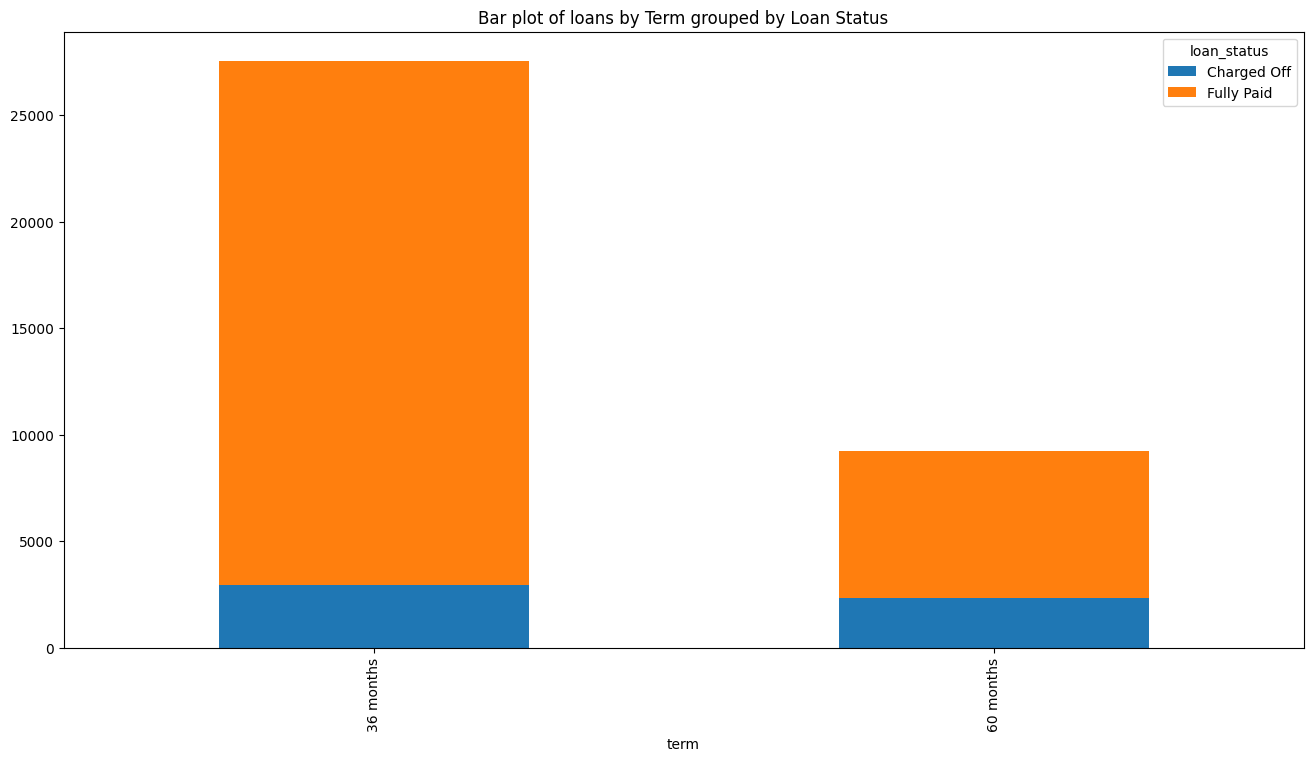

In [66]:
# Bivariate analysis (Categorical) using bar charts of 'term' grouped by 'loan_status'

term_default_table = pd.crosstab(index=loan["term"],
                          columns=loan["loan_status"])
term_default_table
term_default_table.plot(kind="bar",
             figsize=(16,8),
             stacked=True)
plt.title("Bar plot of loans by Term grouped by Loan Status")
plt.show()

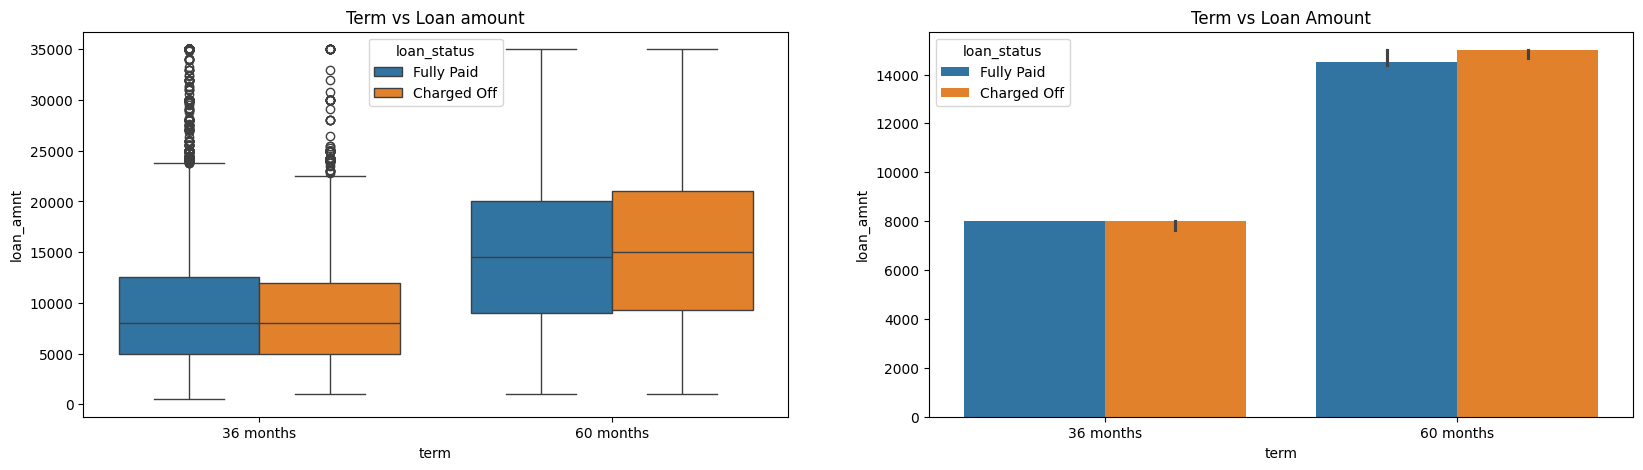

In [67]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=loan)
plt.title('Term vs Loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median)
plt.title('Term vs Loan Amount')
plt.show()

Loan Defaulter cannot be tracked from Loan Amount


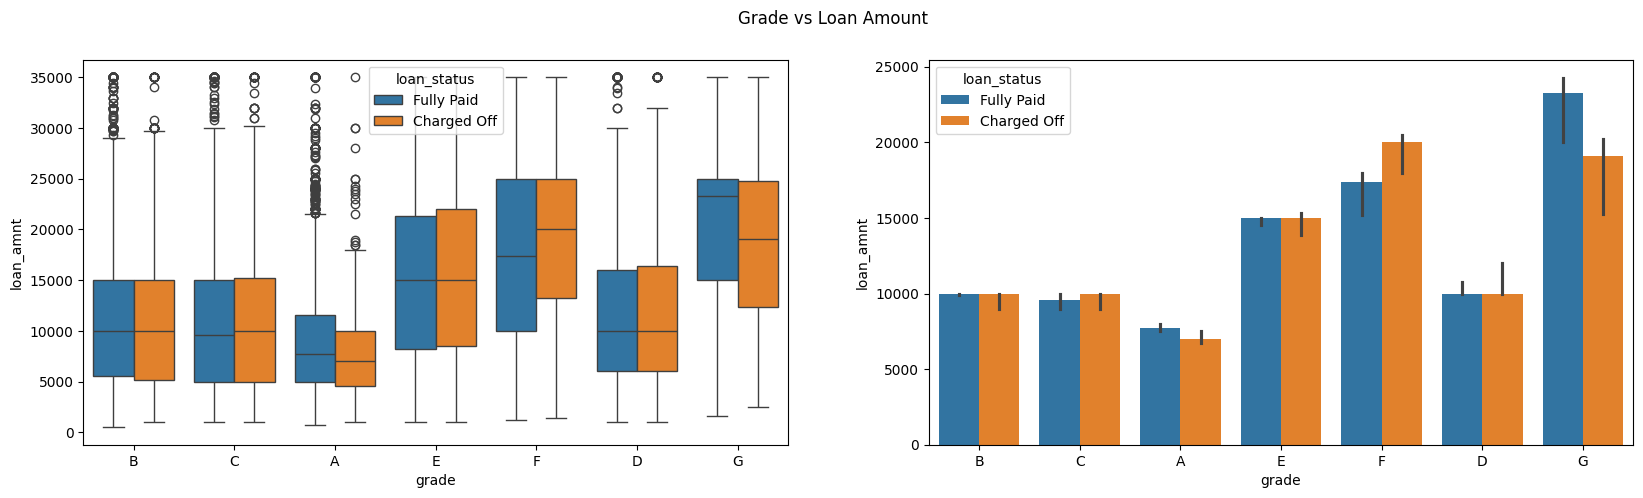

In [68]:
grade = (loan.grade.unique()).sort()
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=loan, order=grade)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median, order=grade)
plt.suptitle('Grade vs Loan Amount')
plt.show()

People with lower grades tend to take out larger loans and are also more likely to default on them

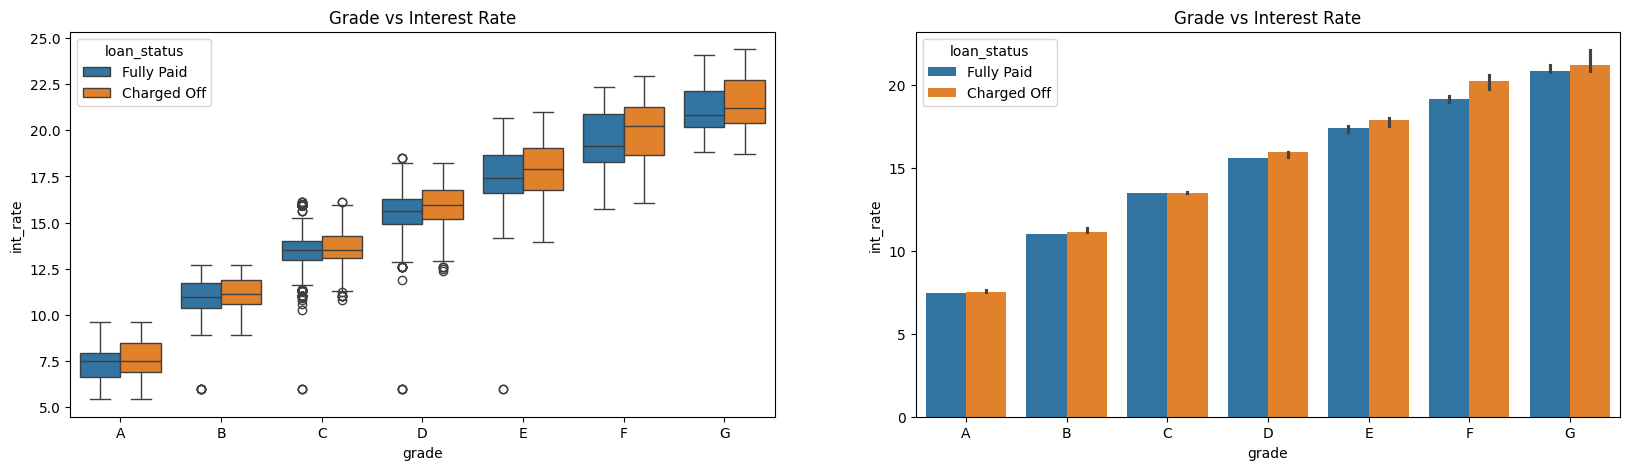

In [69]:
grade_unique = loan.grade.unique()
grade_unique.sort()
grade_unique

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=loan, order=grade_unique)
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=loan, estimator=np.median, order=grade_unique)
plt.title('Grade vs Interest Rate')
plt.show()

More daefaulters as grade decreases

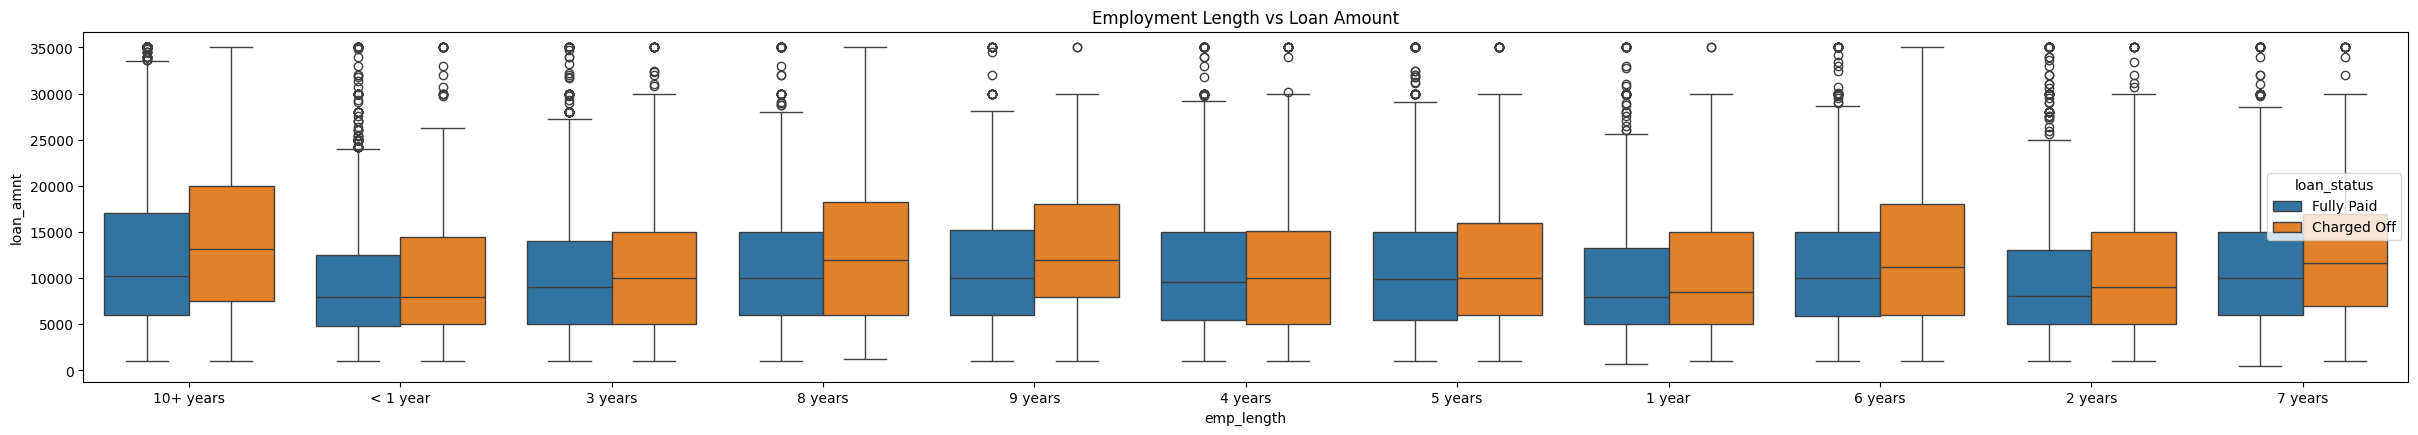

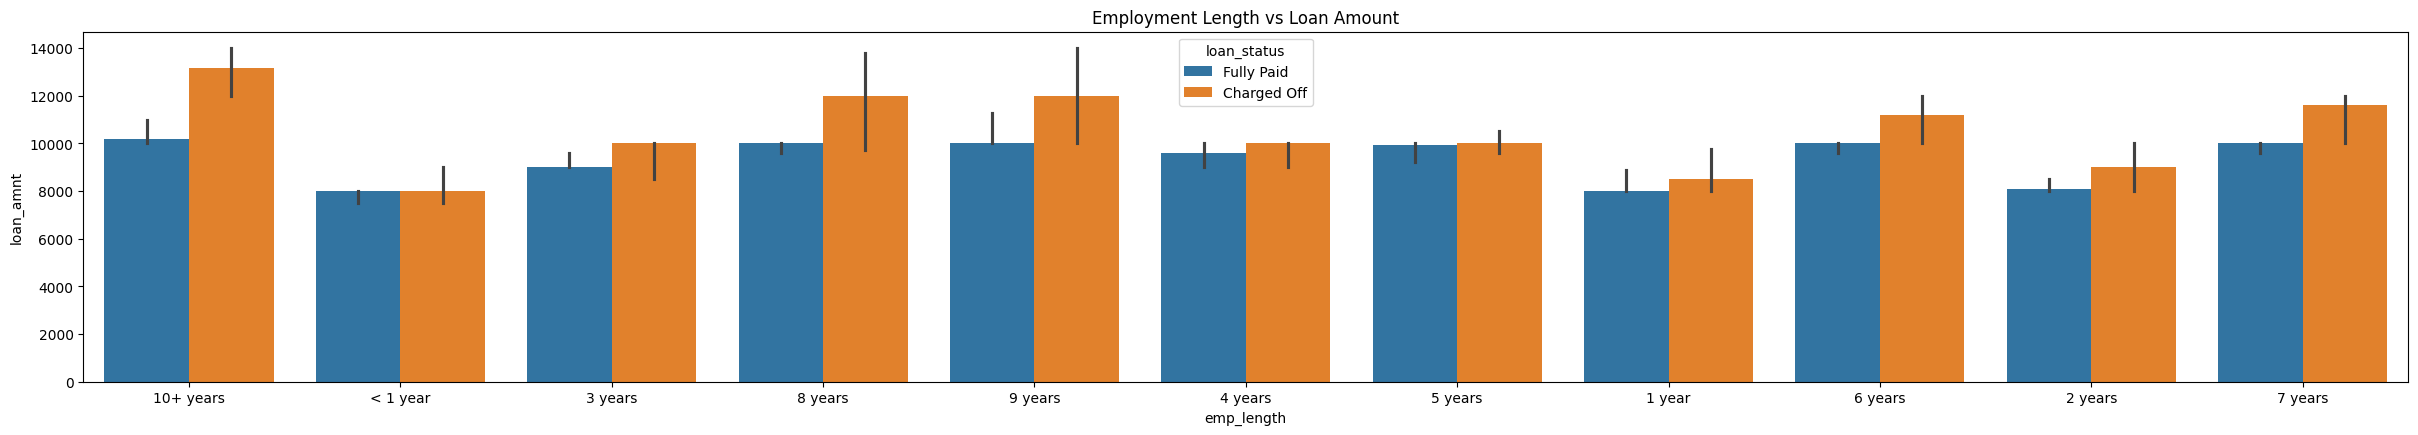

In [70]:
plt.figure(figsize=(30,10))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan)
plt.title('Employment Length vs Loan Amount')

plt.figure(figsize=(30,10))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median)
plt.title('Employment Length vs Loan Amount')
plt.show()

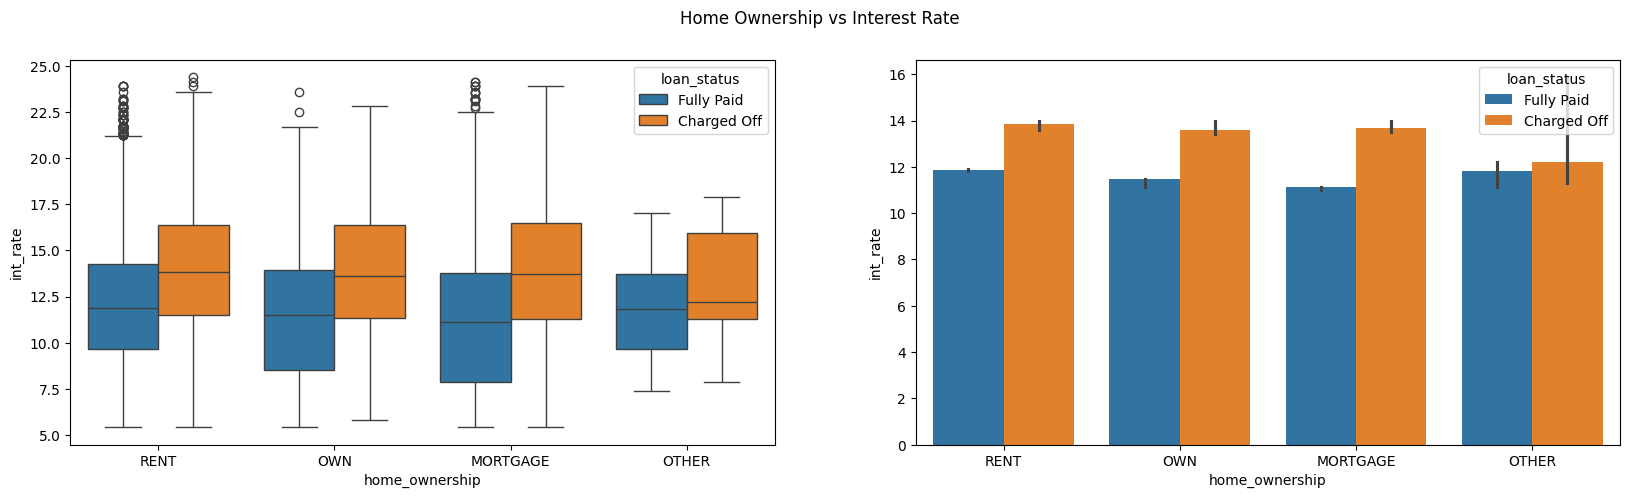

In [71]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('Home Ownership vs Interest Rate')
plt.show()

Interest Rates are Higher for charged-off irrespective of home_ownership,so there is no such data that we can do analysis on

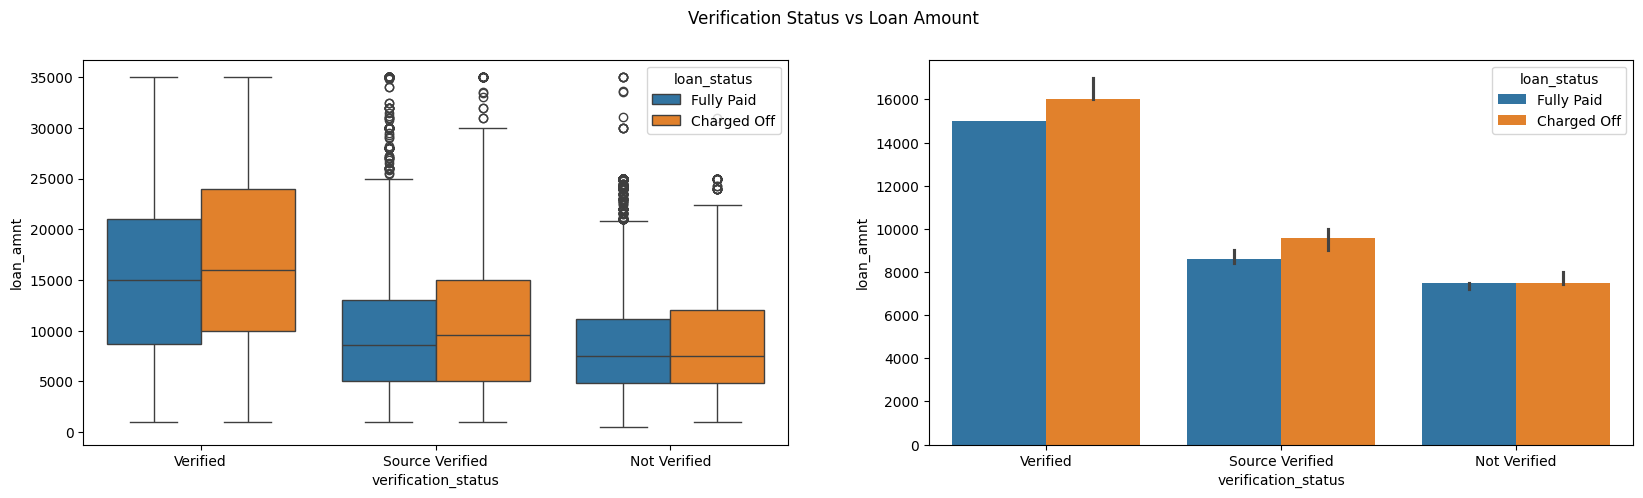

In [72]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('Verification Status vs Loan Amount')
plt.show()

During univariate and bivariate , in both we can see verified have more charged off

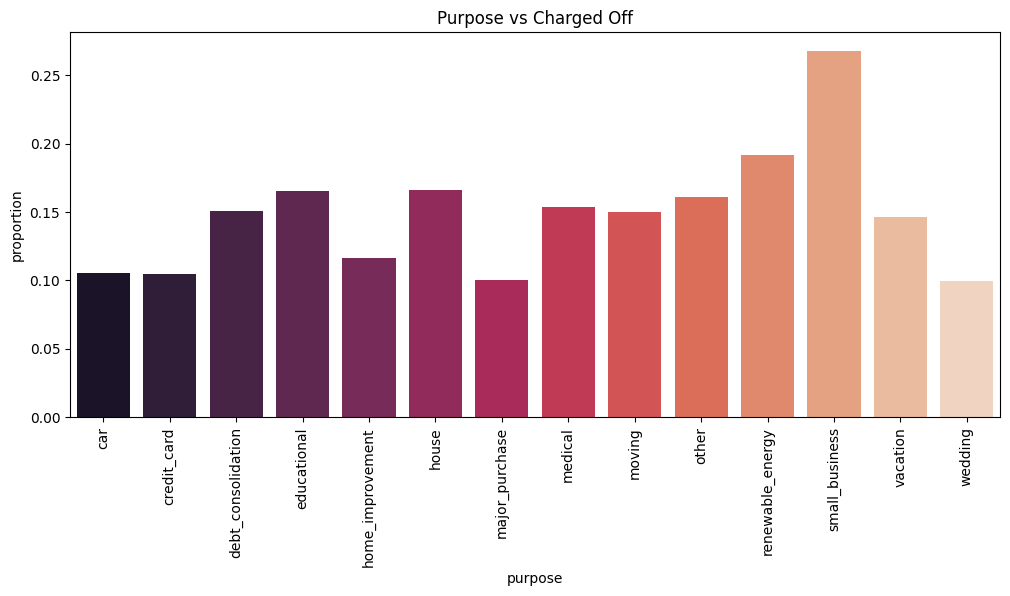

In [73]:
data = loan.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
data['proportion'] = data.groupby('purpose')['id'].transform(lambda x: x/sum(x))
data = data[data.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='proportion', data=data,palette='rocket')
plt.title('Purpose vs Charged Off')
plt.xticks(rotation=90)
plt.show()

<Figure size 640x480 with 0 Axes>

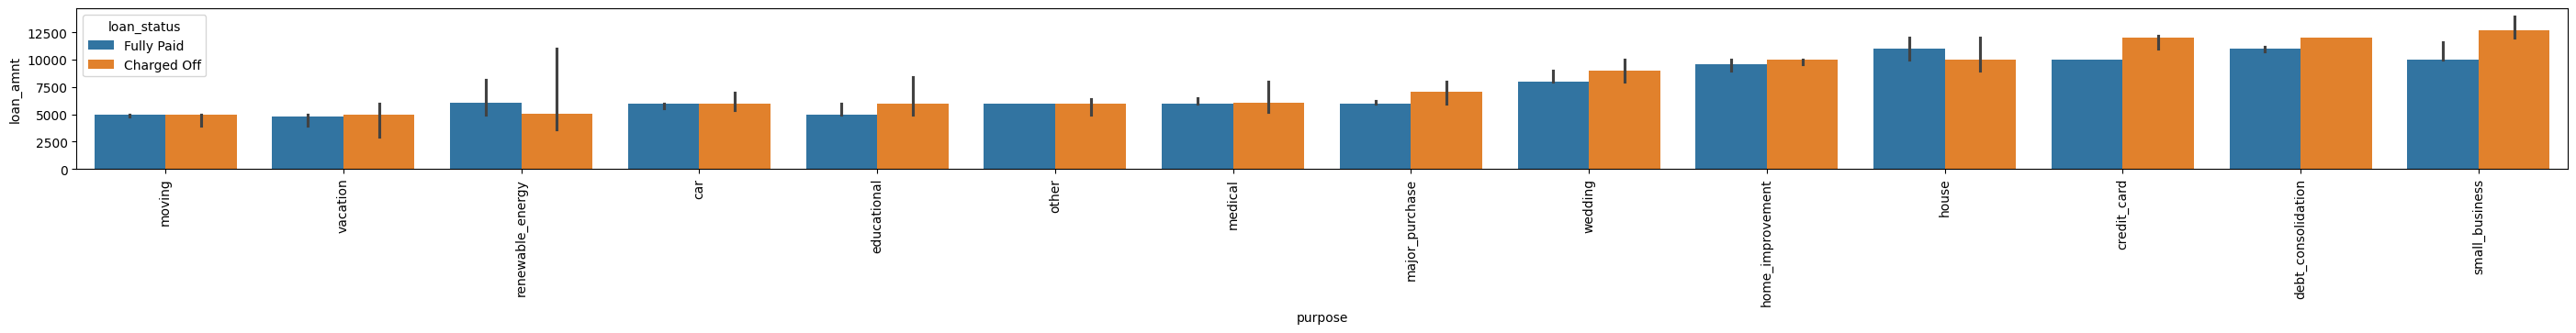

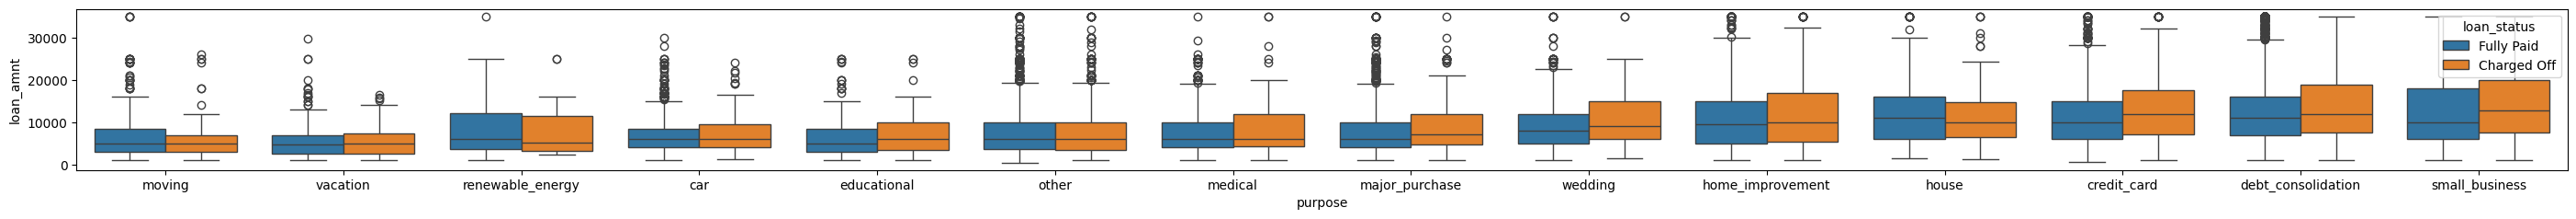

In [74]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()
plt.suptitle('Purpose vs Loan Amount')
plt.figure(figsize=(35,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data=loan, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)
plt.figure(figsize=(35,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data=loan, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

Small Business tend to make more defaults

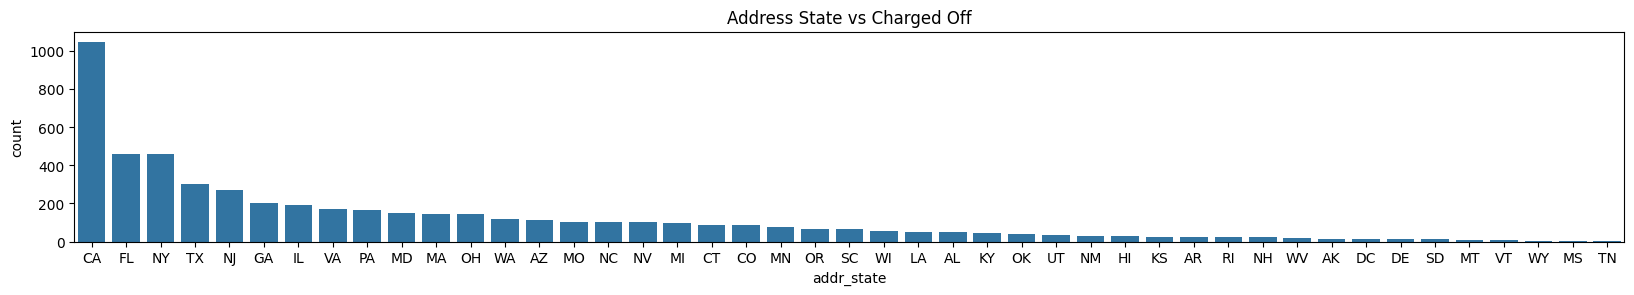

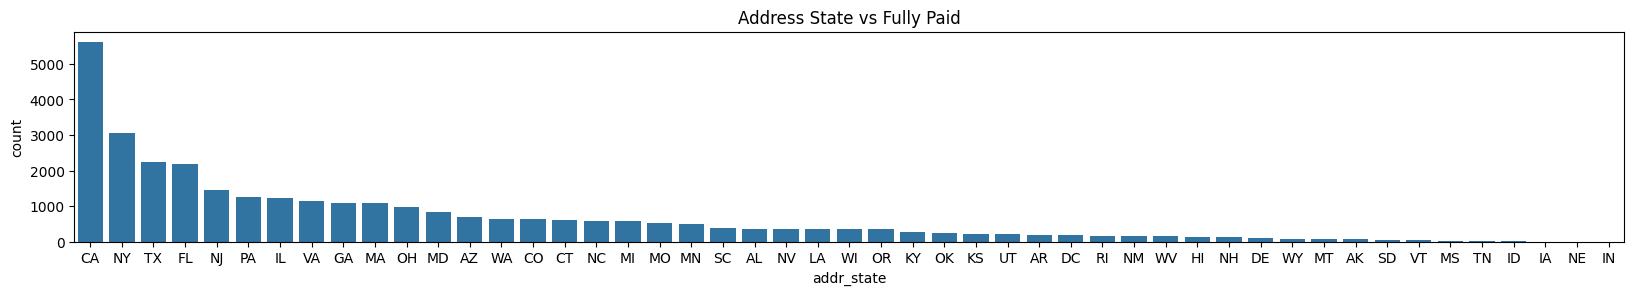

In [75]:
charged_off = loan[loan.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off, order=charged_off.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

ffully_paid = loan[loan.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=ffully_paid, order=ffully_paid.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

More Defaulters on CA,FL and NY

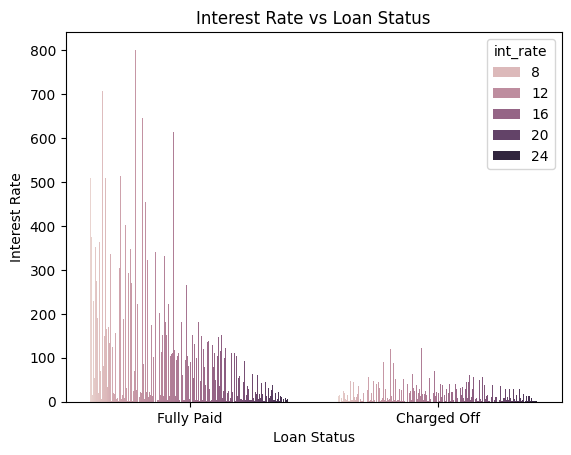

In [76]:
ax = sns.countplot(x="loan_status",data=loan,hue='int_rate')
ax.set_title('Interest Rate vs Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Interest Rate')
plt.show()

# ***MULTIVARIATE ANALYSIS***

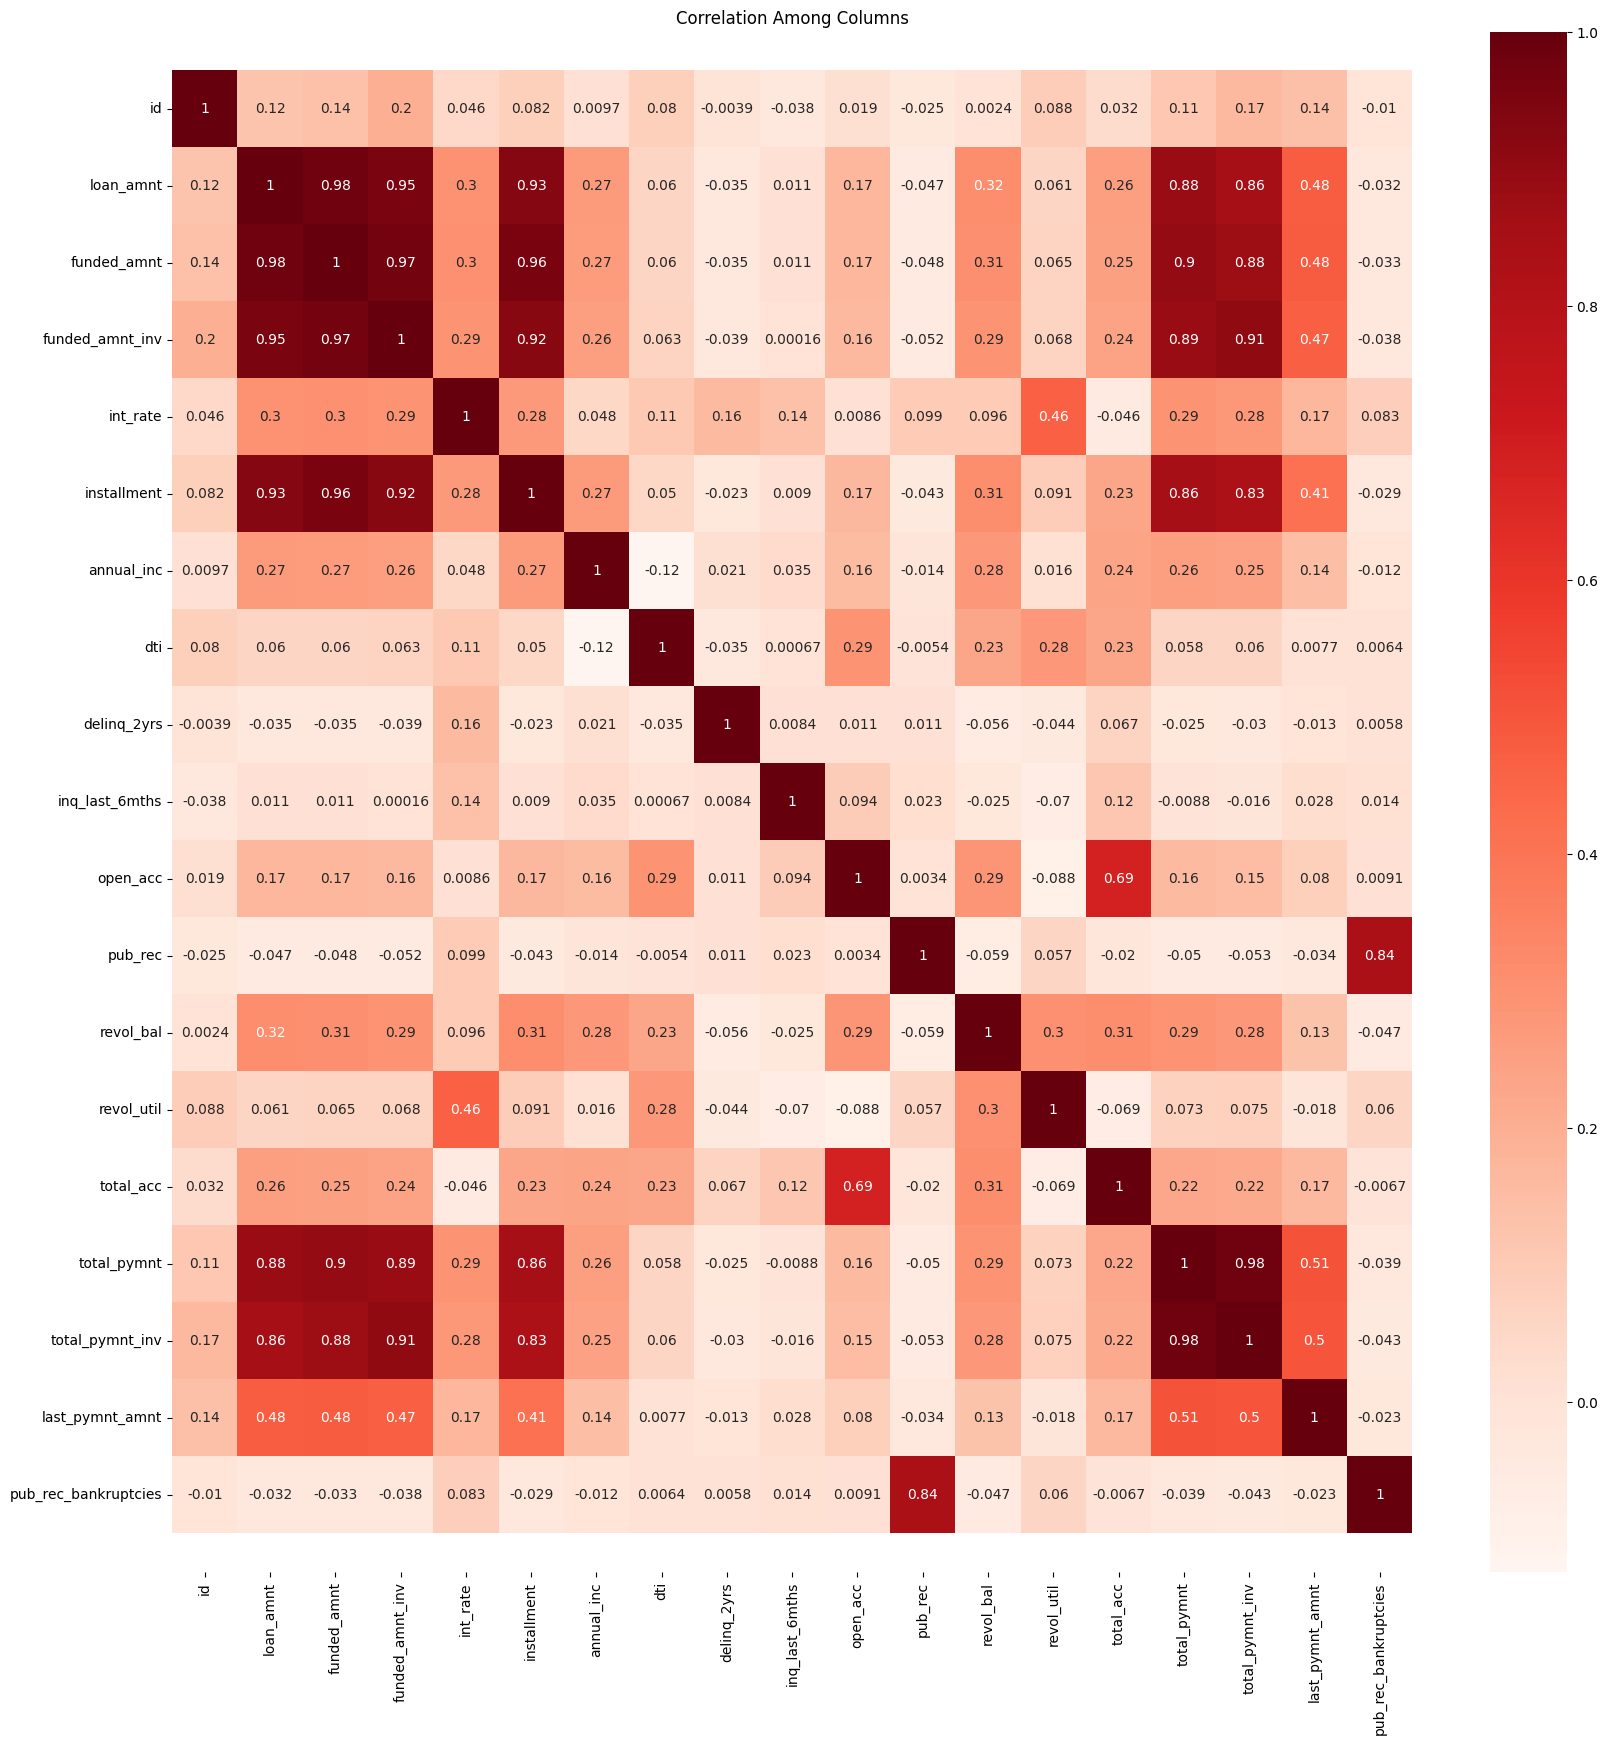

In [77]:
loan_core = loan[['id','loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment',
                  'annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc',
                  'pub_rec','revol_bal','revol_util','total_acc',	'total_pymnt','total_pymnt_inv',
                  'last_pymnt_amnt','pub_rec_bankruptcies']]
corr_matrix = loan_core.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(corr_matrix, annot = True, cmap='Reds')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation Among Columns")
plt.show()